In [4]:
import pandas as pd

In [5]:
big_df = pd.read_csv('one_day_lag_return.csv')

In [2]:
countries = ['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

# Basic example
In this sample, I will analyse 

In [8]:
from tigramite.independence_tests.gpdc import GPDC
from fpcmci.CPrinter import CPLevel
from fpcmci.FPCMCI import FPCMCI
from fpcmci.preprocessing.data import Data
from fpcmci.preprocessing.subsampling_methods.Static import Static
from fpcmci.preprocessing.subsampling_methods.SubsamplingMethod import SubsamplingMethod
from fpcmci.preprocessing.subsampling_methods.WSDynamic import WSDynamic
from fpcmci.preprocessing.subsampling_methods.WSFFTStatic import WSFFTStatic
from fpcmci.preprocessing.subsampling_methods.WSStatic import WSStatic
from fpcmci.selection_methods.TE import TE, TEestimator
from fpcmci.basics.constants import LabelType
import numpy as np

from time import time
from datetime import timedelta

In [7]:
!pip install idtxl

In [10]:
alpha = 0.05
min_lag = 1
max_lag = 1
    
np.random.seed(1)
T = 1000
N = 5
d = np.random.random(size = (T, N))
for t in range(max_lag, T):
    d[t, 0] += 2 * d[t-1, 1] + 3 * d[t-1, 2]
    d[t, 2] += 1.1 * d[t-1, 1]**2
    d[t, 3] += d[t-1, 3]
    
df = Data(d)



-------------------------------------------------------
Selecting relevant features among: ['X_0', 'X_1', 'X_2', 'X_3']
Selection method: Transfer Entropy
Significance level: 0.05
Max lag time: 1
Min lag time: 1
Data length: 1000

##
## Transfer Entropy analysis
##

## Target variable: X_0
	link: (X_0 -1) -?> (X_0)
	|val = 0.032 |pval = 0.002
	link: (X_2 -1) -?> (X_0)
	|val = 1.481 |pval = 0.002
	link: (X_1 -1) -?> (X_0)
	|val = 0.839 |pval = 0.002

## Target variable: X_1
	no sources selected

## Target variable: X_2
	link: (X_1 -1) -?> (X_2)
	|val = 0.392 |pval = 0.002

## Target variable: X_3
	link: (X_3 -1) -?> (X_3)
	|val = 6.222 |pval = 0.002


-------------------------------------------------------
Running Causal Discovery Algorithm

##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
link_assumptions = {0: {(0, -1): '-?>', (2, -1): '-?>', (1, -1): '-?>'}, 1: {}, 2: {(1, -1): '-?>'}, 3: {(3, -1): '-?>'}}
independence test = gp_dc
tau_min = 1
tau_max = 1

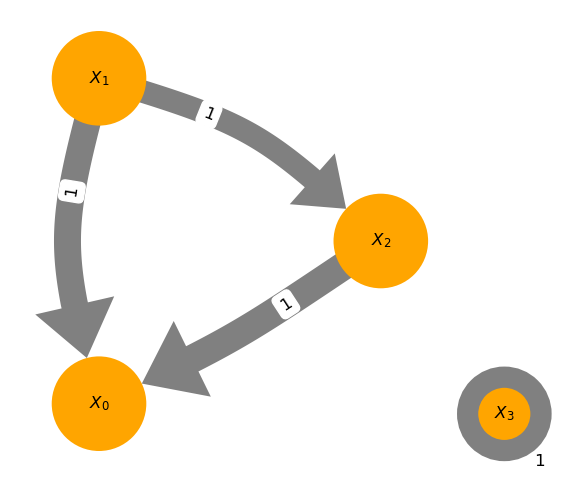

In [14]:
fpcmci = FPCMCI(df, 
            f_alpha = alpha, 
            pcmci_alpha = alpha, 
            min_lag = min_lag, 
            max_lag = max_lag, 
            sel_method = TE(TEestimator.Gaussian), 
            val_condtest = GPDC(significance = 'analytic', gp_params = None),
            verbosity = CPLevel.DEBUG)
sel_var, cm = fpcmci.run()
fpcmci.dag(label_type = LabelType.Lag, node_layout = 'circular')

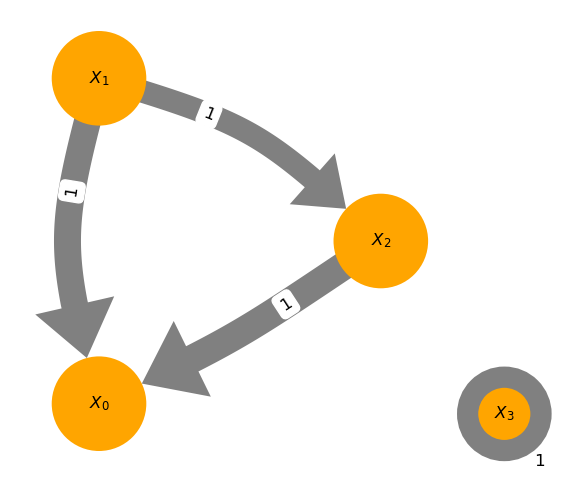

In [15]:
fpcmci.dag(label_type = LabelType.Lag, node_layout = 'circular')

In [30]:
electricity_prices = big_df[countries].values
electricity_prices = Data(electricity_prices)



-------------------------------------------------------
Selecting relevant features among: ['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9']
Selection method: Transfer Entropy
Significance level: 0.05
Max lag time: 3
Min lag time: 1
Data length: 769

##
## Transfer Entropy analysis
##

## Target variable: X_0
	link: (X_0 -3) -?> (X_0)
	|val = 0.014 |pval = 0.002
	link: (X_0 -1) -?> (X_0)
	|val = 0.007 |pval = 0.002
	link: (X_6 -1) -?> (X_0)
	|val = 0.022 |pval = 0.002

## Target variable: X_1
	link: (X_1 -1) -?> (X_1)
	|val = 0.038 |pval = 0.002
	link: (X_2 -1) -?> (X_1)
	|val = 0.031 |pval = 0.002
	link: (X_8 -1) -?> (X_1)
	|val = 0.014 |pval = 0.002

## Target variable: X_2
	link: (X_2 -1) -?> (X_2)
	|val = 0.023 |pval = 0.002
	link: (X_0 -1) -?> (X_2)
	|val = 0.01 |pval = 0.002

## Target variable: X_3
	link: (X_3 -1) -?> (X_3)
	|val = 0.007 |pval = 0.002
	link: (X_3 -3) -?> (X_3)
	|val = 0.006 |pval = 0.002
	link: (X_6 -1) -?> (X_3)
	|val = 0.011 |pval = 0.00

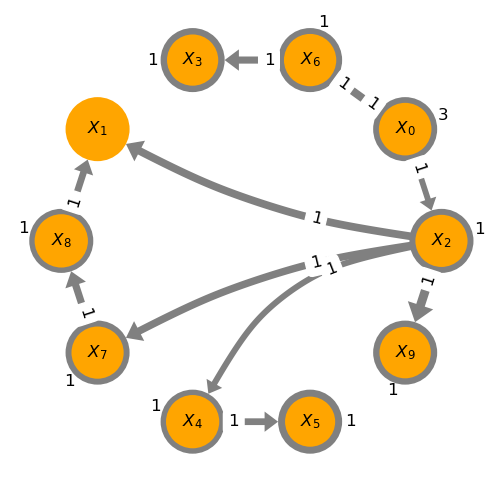

In [41]:
alpha = 0.05
min_lag = 1
max_lag = 3
fpcmci = FPCMCI(electricity_prices, 
            f_alpha = alpha, 
            pcmci_alpha = alpha, 
            min_lag = min_lag, 
            max_lag = max_lag, 
            sel_method = TE(TEestimator.Gaussian), 
            val_condtest = GPDC(significance = 'analytic', gp_params = None),
            verbosity = CPLevel.DEBUG)
sel_var, cm = fpcmci.run()
fpcmci.dag(label_type = LabelType.Lag, node_layout = 'circular')

In [8]:
countries

['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

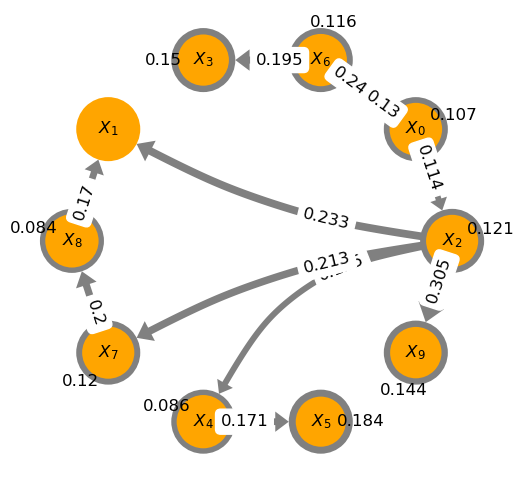

In [48]:
fpcmci.dag(label_type = LabelType.Score, node_layout = 'circular')

In [3]:
countries

['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

In [7]:
countries[8]

'IT'